In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import BayesianRidge, LinearRegression
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [42]:
# Load Data
def load_data():
    data = pd.read_csv('Key_indicator_districtwise.csv')
    features = data.columns
    y_labels = ['YY_Infant_Mortality_Rate_Imr_Total_Person']
    rem_labels = [el for el in features if 'Mortality_Rate' in el]
    rem_indices = np.isin(features, rem_labels)
    y = data[y_labels].values
    x = data.values
    x_removed = x[:,~rem_indices]
    x_labels_removed = features[~rem_indices]
    return x_removed, x_labels_removed, y

def plot_nan_hist(x):
    x_frame = pd.DataFrame(x)
    missing_vals =  x_frame.isnull().sum()
    plt.hist(missing_vals, bins=284)
    plt.yscale('log')
    plt.show()
    
def remove_empty_columns(x, x_labels):
    x_frame = pd.DataFrame(x, columns=x_labels)
    missing_vals =  x_frame.isnull().sum()
    missing = list(missing_vals[missing_vals>284*0.9].index)
    rem_indices = np.isin(x_labels, missing)
    x_removed = x_frame.values[:,~rem_indices]
    x_labels_removed = x_labels[~rem_indices]
    return x_removed, x_labels_removed

def normalize_data(x, x_labels):
    for i in range(17,0,-3):
        x[:, i+1] = x[:, i+1]/x[:, i]
        x[:, i+2] = x[:, i+2]/x[:, i]
        x = np.delete(x, obj=i, axis=1)
        x_labels = np.delete(x_labels, obj=1)
    return x, x_labels

# this is just what I used to look at the columns with missing elements
# my conclusion is that it's impossible to impute the data, since it's on percentages
# and we don't have the total numbers. The total numbers are also missing in the summary files on kaggle.
def examine_missing_urban(x, x_labels):
    x_frame = pd.DataFrame(x, columns=labels)
    missing_vals =  x_frame.isnull().sum()
    missing = list(missing_vals[missing_vals>40].index)
    print len(missing)
    print set([el.split('_')[0] for el in missing])
    print missing
    urbans = [el for el in missing if el.split('_')[-1]=='Urban']
    for label in urbans[7:10]:
        cut_out = '_'.join(label.split('_')[:-1])
        #final_el = join(label.split('_')[-1])
        total_label = cut_out + '_Total'
        rural_label = cut_out + '_Rural'
        if sum(x_frame[total_label].isnull()) != 0:
            print "total has nans!"
        if sum(x_frame[rural_label].isnull()) != 0:
            print "rural has nans!", label
            #print x_frame[[total_label,rural_label, label]]
        new_urban = x_frame[total_label]-x_frame[rural_label]
        print x_frame[[total_label, rural_label]]
        sim_labels = [el for el in labels_raw if cut_out in el]
        x_frame = pd.DataFrame(x, columns=labels)
        missing_vals =  x_frame.isnull().sum()
        below_25_missing = missing_vals[missing_vals<25]
        zero_to_25_missing = below_25_missing[below_25_missing>0]
        print zero_to_25_missing
        missing = list(missing_vals[missing_vals>25].index)
        rem_indices = np.isin(labels, missing)
        print x_frame.shape

def remove_nan_rows(x, y):
    new_x = x[:,2:]
    z = np.zeros(new_x.shape[0])
    for i in range(0,new_x.shape[0]):
        for j in range(0,new_x.shape[1]):
            z[i] += np.isnan(new_x[i,j])
    x_no_nans = new_x[z == 0]
    y_removed_rows = y[z == 0]
    return x_no_nans, y_removed_rows

def remove_nan_columns(x, labels):
    new_x = x[:,2:]
    z = np.zeros(new_x.shape[1])
    for i in range(0,new_x.shape[0]):
        for j in range(0,new_x.shape[1]):
            z[j] += np.isnan(new_x[i,j])
    x_no_nans = new_x[:,z == 0]
    x_cols_no_nans = labels[2:][z==0]
    return x_no_nans, x_cols_no_nans

def save_frame(X, y, tag):
    X['YY_Infant_Mortality_Rate_Imr_Total_Person'] = y
    X.to_csv("Clean_Key_indicator_districtwise_"+tag+".csv")

def center(X, labels):
    centered_X_rows = preprocessing.scale(X, axis=0)
    x_pandas = pd.DataFrame(centered_X_rows, columns=labels)
    return x_pandas

def get_corr_plot(frame, tag="rows"):
    correlations = frame.astype(float).corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    plt.show()
    fig.savefig('correlations_'+tag+'.png',  dpi = 1000)

#def get_state_vars():
    # make state and district categorical variables
    # states = pd.get_dummies(x_raw[:,0])
    # dists = pd.get_dummies(x_raw[:,1])
    # state_cols = states.columns
    # dists_cols = dists.columns
    # new_cols = np.append(state_cols, dists_cols)
    # new_vars = np.append(states, dists, axis=1)
    # # then append
    # x1 = np.delete(x1, obj=1, axis=1)
    # x1 = np.delete(x1, obj=0, axis=1)
    # x_raw_labels1 = np.delete(x_raw_labels1, obj=1)
    # x_raw_labels1 = np.delete(x_raw_labels1, obj=0)

    # #x_raw_labels1 = np.append(new_cols, x_raw_labels1)
    # #x_new = np.append(new_vars, x1, axis=1)
    # #x = x_new
    # #x_labels = x_raw_labels1
    # x = x1
    # x_labels = x_raw_labels1

In [49]:
print X_rows.shape, labels[2:].shape
print X_cols.shape, lab_cols.shape
print 284-227
print 604-419

(227, 604) (604,)
(284, 419) (419,)
57
185


(284, 608) (608,)


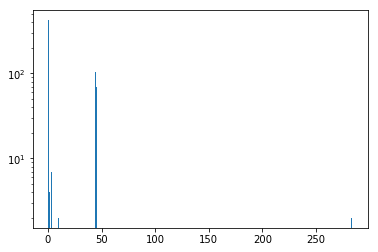

In [45]:
x_raw, labels_raw, y = load_data()
print x_raw.shape, labels_raw.shape
plot_nan_hist(x_raw)
x, labels = remove_empty_columns(x_raw, labels_raw)
X_rows, y_rows = remove_nan_rows(x, y)
X_rows_df = center(X_rows, labels[2:])
X_cols, lab_cols = remove_nan_columns(x, labels)
X_cols_df = center(X_cols, lab_cols)
centered_X_cols = preprocessing.scale(X_cols, axis=0)
save_frame(X_rows_df, y_rows, "rem_rows")
save_frame(X_cols_df, y, "rem_cols")


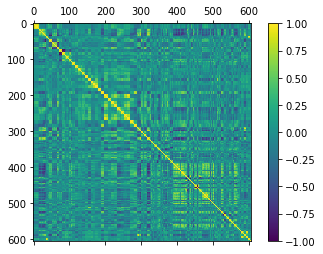

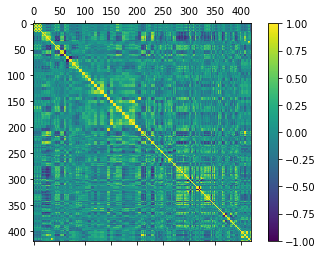

In [44]:
get_corr_plot(X_rows_df, "rows")
get_corr_plot(X_cols_df, "cols")